## LSTM 모델을 이용한 영화리뷰 분류 분석

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [2]:
print(tf.__version__)

2.3.0


### Step 1-1. Input tensor 와 Target tensor 준비(훈련데이터)
* IMDB 영화 리뷰 데이터 down

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
len(input_train), len(input_test)

(25000, 25000)

In [5]:
input_train.shape

(25000,)

In [6]:
print(input_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### Step 1-2. 입력 데이터의 전처리 
* LSTM 모델에 데이터를 입력하기 위해 시퀀스 데이터의 길이를 통일

In [7]:
input_train = sequence.pad_sequences(input_train, 800)
input_test = sequence.pad_sequences(input_test, 800)

In [8]:
input_train.shape, input_test.shape

((25000, 800), (25000, 800))

In [9]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### Step2. LSTM 모델 디자인

In [10]:
# embedding layer: 32차원, hidden layer : 1개[32], activation : tanh
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=32))
model.add(layers.LSTM(units=32))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### Step 3. 모델의 학습 정보 설정

In [12]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

### Step 4. 모델에 input, target 데이터 연결 후 학습

In [13]:
# batch size : 128, epochs : 10, validation data set percent : 20%
history = model.fit(
    x=input_train, y=y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 7s 46ms/step - loss: 0.5219 - acc: 0.7558 - val_loss: 0.3697 - val_acc: 0.8422
Epoch 2/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3097 - acc: 0.8788 - val_loss: 0.3328 - val_acc: 0.8592
Epoch 3/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2445 - acc: 0.9075 - val_loss: 0.4056 - val_acc: 0.8152
Epoch 4/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2042 - acc: 0.9258 - val_loss: 0.3124 - val_acc: 0.8708
Epoch 5/10
157/157 [==============================] - 7s 43ms/step - loss: 0.1824 - acc: 0.9348 - val_loss: 0.3633 - val_acc: 0.8828
Epoch 6/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1604 - acc: 0.9443 - val_loss: 0.3073 - val_acc: 0.8890
Epoch 7/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1440 - acc: 0.9485 - val_loss: 0.3060 - val_acc: 0.8816
Epoch 8/10
157/157 [==============================] - 7s 44ms/step - 

### 학습과정의 시각화 및 성능 테스트

In [14]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [15]:
# 차트의 x 축을 위한 epoch 정보 생성
epochs = range(1, len(acc) + 1)

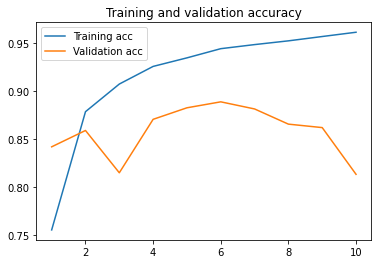

In [16]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

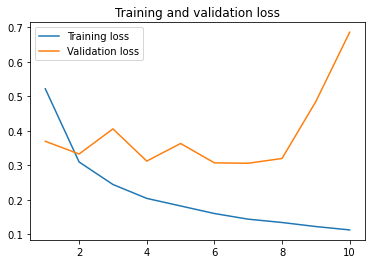

In [17]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
# 테스트 데이터 셋을 통한 성능 측정
test_loss, test_acc = model.evaluate(x=input_test, y=y_test)

782/782 [==============================] - 12s 16ms/step - loss: 0.6937 - acc: 0.8097


## 적층 LSTM 모델 구조를 이용한 분류 분석

### Step2. 적층 LSTM 모델 디자인

In [19]:
# embedding layer: 32차원, hidden layer : 2개[32, 16], activation : tanh, dropout rate : 0.5
stack_model = models.Sequential()
stack_model.add(layers.Embedding(input_dim=10000, output_dim=32))
stack_model.add(layers.LSTM(units=32, return_sequences=True))
stack_model.add(layers.Dropout(0.5))
stack_model.add(layers.LSTM(units=16))
stack_model.add(layers.Dense(units=1, activation='sigmoid'))

In [20]:
stack_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 331,473
Trainable params: 331,473
Non-trainable params: 0
_________________________________________________________________


In [21]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
stack_model.compile(loss='binary_crossentropy',
                    optimizer='rmsprop',
                    metrics=['acc'])

In [22]:
# batch size : 128, epochs : 10, validation data set percent : 20%
history = stack_model.fit(
    x=input_train, y=y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 12s 79ms/step - loss: 0.4869 - acc: 0.7623 - val_loss: 0.3962 - val_acc: 0.8510
Epoch 2/10
157/157 [==============================] - 12s 74ms/step - loss: 0.3000 - acc: 0.8827 - val_loss: 0.2970 - val_acc: 0.8784
Epoch 3/10
157/157 [==============================] - 12s 74ms/step - loss: 0.2390 - acc: 0.9115 - val_loss: 0.3265 - val_acc: 0.8726
Epoch 4/10
157/157 [==============================] - 11s 73ms/step - loss: 0.1995 - acc: 0.9298 - val_loss: 0.2984 - val_acc: 0.8904
Epoch 5/10
157/157 [==============================] - 11s 73ms/step - loss: 0.1723 - acc: 0.9399 - val_loss: 0.2931 - val_acc: 0.8866
Epoch 6/10
157/157 [==============================] - 11s 73ms/step - loss: 0.1513 - acc: 0.9460 - val_loss: 0.3652 - val_acc: 0.8552
Epoch 7/10
157/157 [==============================] - 11s 73ms/step - loss: 0.1359 - acc: 0.9541 - val_loss: 0.3411 - val_acc: 0.8820
Epoch 8/10
157/157 [==============================] - 11s 72ms

In [23]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

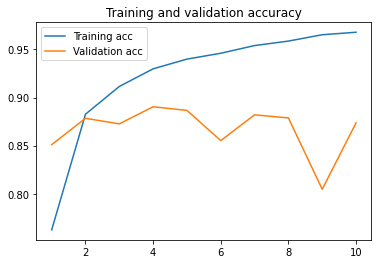

In [24]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

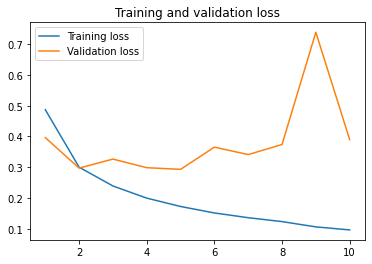

In [25]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# 테스트 데이터 셋을 통한 성능 측정
test_loss, test_acc =  stack_model.evaluate(x=input_test, y=y_test)

782/782 [==============================] - 21s 27ms/step - loss: 0.4313 - acc: 0.8600


## GRU 모델 구조를 이용한 분류 분석

### Step2. GRU 모델 디자인

In [27]:
# embedding layer: 32차원, hidden layer : 32 개, activation : tanh
gru_model = models.Sequential()
gru_model.add(layers.Embedding(input_dim=10000, output_dim=32))
gru_model.add(layers.GRU(units=32))
gru_model.add(layers.Dense(units=1, activation='sigmoid'))

In [28]:
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [29]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
gru_model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])

In [30]:
# batch size : 128, epochs : 10, validation data set percent : 20%
history = gru_model.fit(
    x=input_train, y=y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 7s 46ms/step - loss: 0.5179 - acc: 0.7288 - val_loss: 0.3850 - val_acc: 0.8352
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3099 - acc: 0.8740 - val_loss: 0.3825 - val_acc: 0.8378
Epoch 3/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2527 - acc: 0.9025 - val_loss: 0.3090 - val_acc: 0.8706
Epoch 4/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2132 - acc: 0.9191 - val_loss: 0.3352 - val_acc: 0.8622
Epoch 5/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1939 - acc: 0.9290 - val_loss: 0.3037 - val_acc: 0.8712
Epoch 6/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1684 - acc: 0.9399 - val_loss: 0.4690 - val_acc: 0.8130
Epoch 7/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1517 - acc: 0.9435 - val_loss: 0.3190 - val_acc: 0.8674
Epoch 8/10
157/157 [==============================] - 7s 44ms/step - 

In [31]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

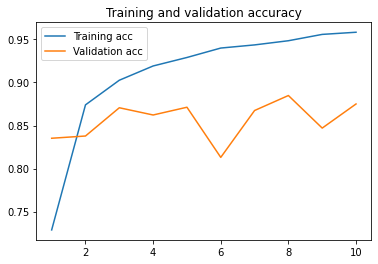

In [32]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

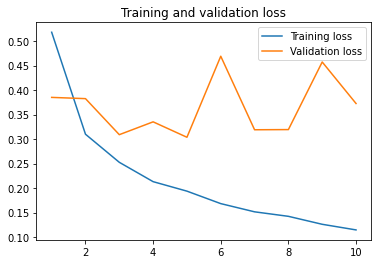

In [33]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
# 테스트 데이터 셋을 통한 성능 측정
test_loss, test_acc = gru_model.evaluate(x=input_test, y=y_test)

782/782 [==============================] - 12s 15ms/step - loss: 0.4458 - acc: 0.8544
